In [1]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random

In [2]:
TRAINDIR = 'C:/Users/ADMIN/Desktop/Snehil devops/train'
CATEGORIES = ["apple","orange"]

In [3]:
nrows = 150
ncolumns = 150
channels = 3

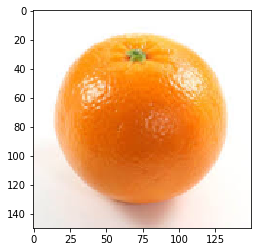

In [4]:
train_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAINDIR,category)      # path to apple or orange directory
        class_num = CATEGORIES.index(category)
       
        for image in os.listdir(path):             # Bunch of images in the path
            
            image_array1 = cv2.imread(os.path.join(path,image),cv2.IMREAD_COLOR) 
            
            new_array1 = cv2.resize(image_array1,(nrows,ncolumns))       # Normalising sizes of all pics to (150,150) 
            
            color_img = cv2.cvtColor(new_array1, cv2.COLOR_BGR2RGB)
            imgplot=plt.imshow(color_img)
            
            train_data.append([color_img,class_num])        # Collecting all training data along with indices   
            
create_training_data()

In [5]:
random.shuffle(train_data)

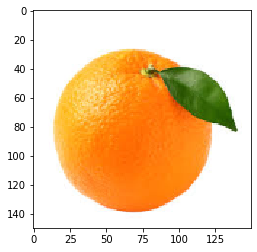

In [6]:
plt.imshow(train_data[1][0])
plt.show()  

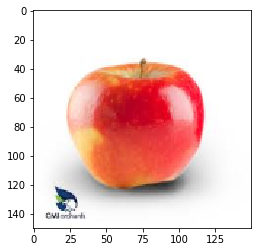

In [7]:
plt.imshow(train_data[2][0])
plt.show()       

In [8]:
X = []
y = []

for feature,label in train_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1,nrows,ncolumns,channels)  
y = np.array(y)

In [9]:
X[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
y

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

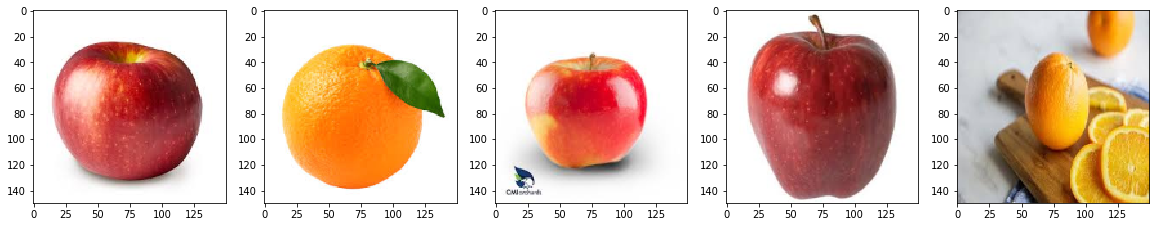

In [11]:
plt.figure(figsize=(20,20))
columns = 5
for i in range(columns):
    plt.subplot(5/columns + 1, columns, i + 1)
    plt.imshow(X[i])

Text(0.5, 1.0, 'Labels for apples and oranges')

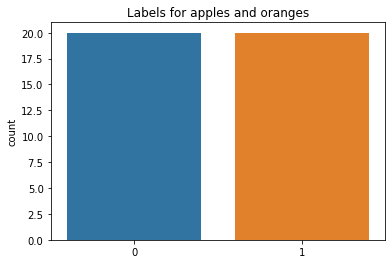

In [12]:
import seaborn as sns
sns.countplot(y)
plt.title('Labels for apples and oranges')

In [13]:
X.shape

(40, 150, 150, 3)

In [14]:
y.shape

(40,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(32, 150, 150, 3)
(8, 150, 150, 3)
(32,)
(8,)


In [17]:
#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32

print(ntrain)
print(nval)

32
8


In [18]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

Using TensorFlow backend.


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [20]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(rescale=1/255,   
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1/255) 

In [22]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [23]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/64
1/1 [==============================] - 6s 6s/step - loss: 0.7065 - acc: 0.4375 - val_loss: 0.8212 - val_acc: 0.2500
Epoch 2/64
1/1 [==============================] - 1s 1s/step - loss: 0.6678 - acc: 0.5625 - val_loss: 0.7575 - val_acc: 0.2500
Epoch 3/64
1/1 [==============================] - 1s 1s/step - loss: 0.6678 - acc: 0.5625 - val_loss: 0.7680 - val_acc: 0.2500
Epoch 4/64
1/1 [==============================] - 1s 1s/step - loss: 0.6510 - acc: 0.5625 - val_loss: 0.7596 - val_acc: 0.2500
Epoch 5/64
1/1 [==============================] - 1s 1s/step - loss: 0.6300 - acc: 0.5625 - val_loss: 0.7385 - val_acc: 0.2500
Epoch 6/64
1/1 [==============================] - 1s 1s/step - loss: 0.6239 - acc: 0.5938 - val_loss: 0.6869 - val_acc: 0.3750
Epoch 7/64
1/1 [==============================] - 1s 1s/step - loss: 0.6036 - acc: 0.6875 - val_loss: 0.6855 - val_acc: 0.2500
Epoch 8/64
1/1 [==============================] - 1s 1s/step - loss: 0.5691 - acc: 0.6875 - val_loss: 0.5079 - 

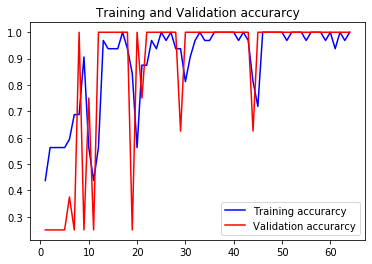

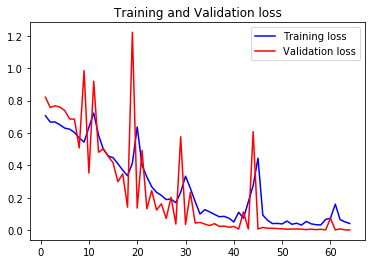

In [24]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [25]:
TRAINDIR2 = 'C:/Users/ADMIN/Desktop/Snehil devops/train2'
CATEGORIES = ["apple","orange"]

In [26]:
nrows = 150
ncolumns = 150
channels = 3

In [27]:
train_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAINDIR2,category)      # path to apple or orange directory
        class_num = CATEGORIES.index(category)
       
        for image in os.listdir(path):             # Bunch of images in the path
            
            image_array1 = cv2.imread(os.path.join(path,image)) 
            
            new_array1 = cv2.resize(image_array1,(nrows,ncolumns))       # Normalising sizes of all pics to (150,150) 
            
            train_data.append([new_array1,class_num])        # Collecting all training data along with indices 

create_training_data()

In [28]:
random.shuffle(train_data)

In [29]:
X = []
y = []

for feature,label in train_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1,nrows,ncolumns,channels)  
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [32]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(rescale=1/255,   
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1/255) 

In [34]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [35]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/64
1/1 [==============================] - 2s 2s/step - loss: 0.7488 - acc: 0.0000e+00 - val_loss: 0.7260 - val_acc: 0.0000e+00
Epoch 2/64
1/1 [==============================] - 0s 322ms/step - loss: 0.6702 - acc: 0.7500 - val_loss: 0.7659 - val_acc: 0.0000e+00
Epoch 3/64
1/1 [==============================] - 0s 238ms/step - loss: 0.7086 - acc: 0.2500 - val_loss: 0.7933 - val_acc: 0.0000e+00
Epoch 4/64
1/1 [==============================] - 0s 228ms/step - loss: 0.7221 - acc: 0.2500 - val_loss: 0.8002 - val_acc: 0.0000e+00
Epoch 5/64
1/1 [==============================] - 0s 223ms/step - loss: 0.6538 - acc: 0.5000 - val_loss: 0.8223 - val_acc: 0.0000e+00
Epoch 6/64
1/1 [==============================] - 0s 236ms/step - loss: 0.6598 - acc: 0.5000 - val_loss: 0.8112 - val_acc: 0.0000e+00
Epoch 7/64
1/1 [==============================] - 0s 220ms/step - loss: 0.6797 - acc: 0.5000 - val_loss: 0.8222 - val_acc: 0.0000e+00
Epoch 8/64
1/1 [==============================] - 0s 236ms/st

Epoch 63/64
1/1 [==============================] - 0s 239ms/step - loss: 0.0513 - acc: 1.0000 - val_loss: 0.4359 - val_acc: 1.0000
Epoch 64/64
1/1 [==============================] - 0s 235ms/step - loss: 0.0359 - acc: 1.0000 - val_loss: 0.3430 - val_acc: 1.0000


In [36]:
test_datagen=ImageDataGenerator(rescale=1./255)

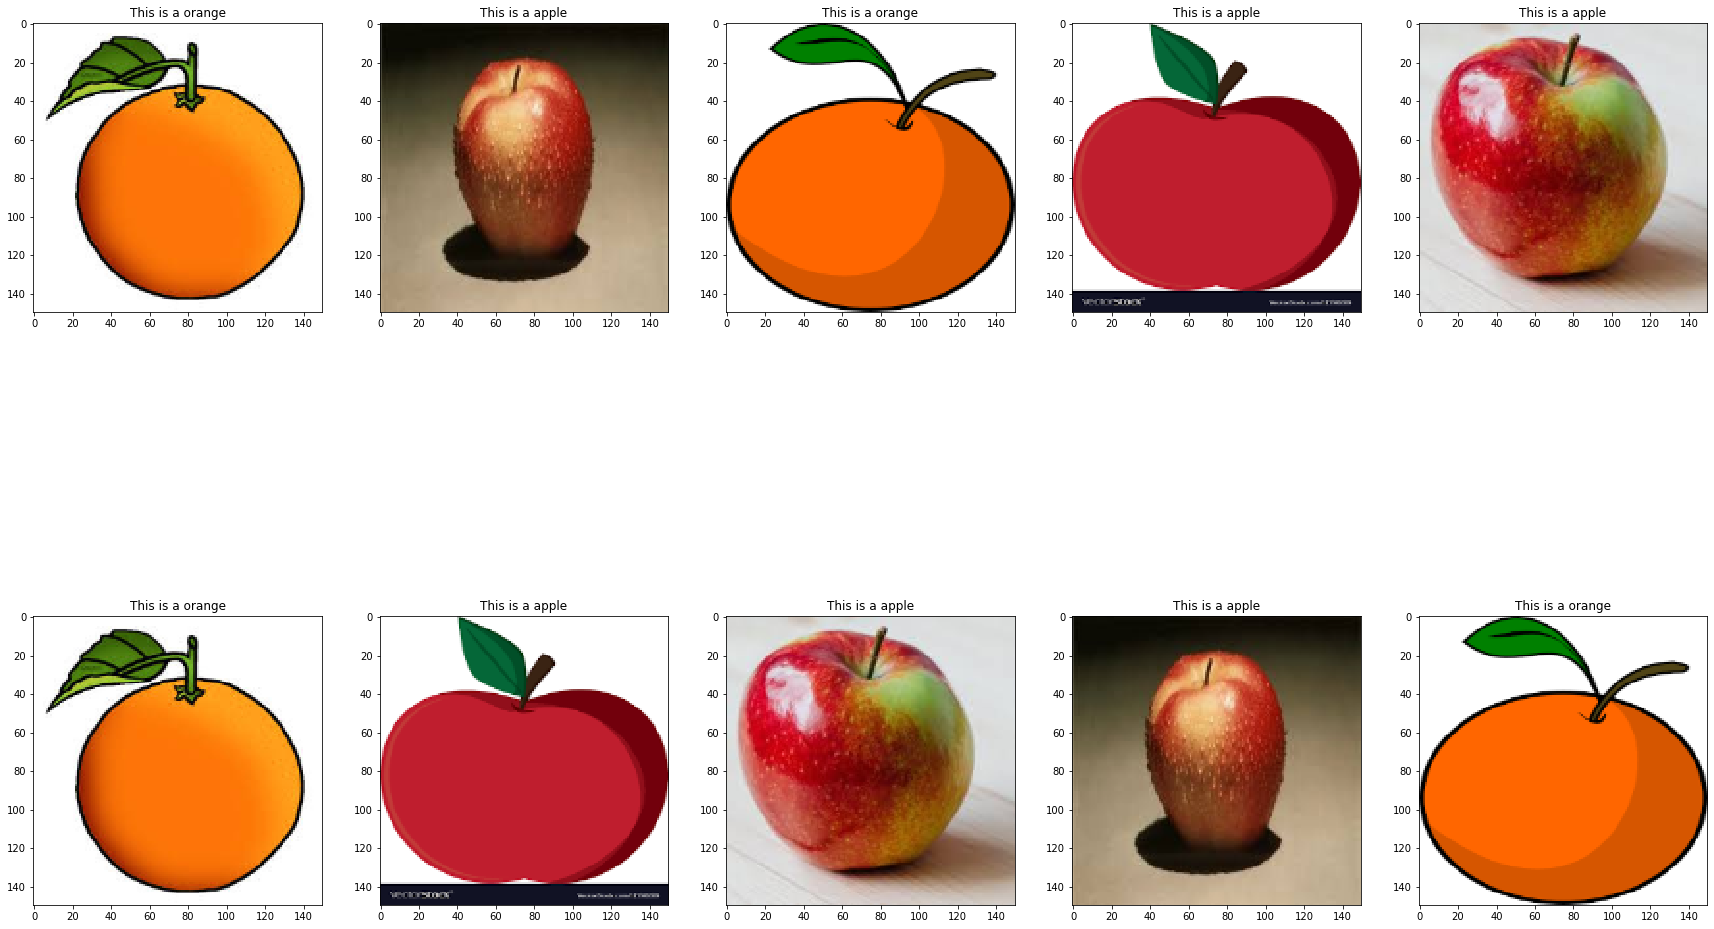

In [37]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(X, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('orange')
    else:
        text_labels.append('apple')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    color_img = cv2.cvtColor(batch[0], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(color_img)
    i += 1
    if i % 10 == 0:
        break
plt.show()